##### Cours : OpenClassRooms

La data visualisation avec Seaborn

##### Date : 07-02-23
***

##### <font color = 'green'>Présentation du package</font>
Seaborn est similaire à Matplotlib met permet d'obtenir des graphiques de meilleure qualité.

L'inconvénient est la fonctionnalité du packages plus compliqué que Matplotlib.

À cela, on peut personnaliser les graphiques avec Matplotlib et donner une meilleur qualité de ces graphiques avec Seaborn, qui intervient en tant que "surcouche" à Matplotlib : ces deux packages se complètent.

On pourrait imaginer que Seaborn est une voiture flambant neuve dont l’ensemble du châssis et le moteur seraient Matplotlib.

##### <font color = 'green'>Fonctionnalités de Seaborn</font>

Seaborn possède de nombreuses fonctions (plus d’une vingtaine) pour répondre à toutes les situations possibles en termes de visualisation. 

Pour en citer quelques-unes : 

-> lineplot  pour tracer des courbes ;

-> boxplot  pour des boîtes à moustaches ;

-> histplot  pour des histogrammes ;

-> kdeplot  pour un graphique à densité ;

-> pairplot  pour tracer l’ensemble des variables numériques deux à deux, sur un seul graphique !

Documentation officielle :
https://seaborn.pydata.org/api.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation du fichier des prêts
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets.csv')

# calcul du taux d'endettement
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

# renommer taux en taux_interet
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

# calculer le cout total du pret
prets['cout_total'] = prets['remboursement'] * prets['duree']

# calculer les bénéfices mensuels réalisés
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

# création d'une variable risque
prets['risque'] = 'Non'
prets.loc[prets['taux_endettement'] > 35, 'risque'] = 'Oui'

# dataframe de profils clients
profil_clients = prets.groupby('identifiant')[['remboursement','taux_endettement','cout_total','benefices']].sum()
profil_clients.reset_index(inplace=True)

In [3]:
# %pip install seaborn

<font color = 'yellow'>Exemple d'une configuration du nuage de points </font>

Avec Matplotlib, pour ajouter plusieurs couleurs dans le nuage de points, il fallait recourir à une boucle (voir indexH005)

Avec Seaborn, il suffit de recourir au paramètre 'hue' qui ajoutera automatiquement une couleur pour chaque valeur insérée

<AxesSubplot: xlabel='revenu', ylabel='taux_endettement'>

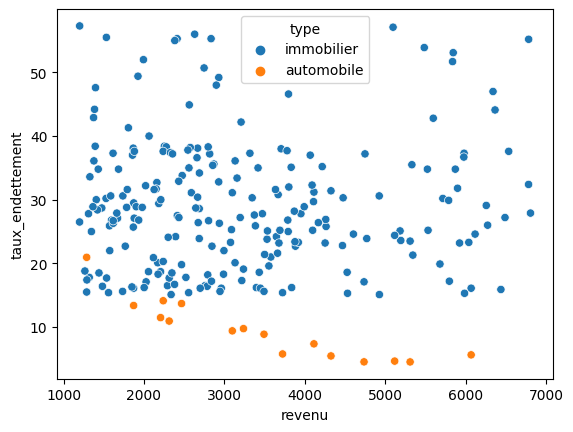

In [4]:
# Ajout de couleur par type d'emprunt
sns.scatterplot(data=prets, 
                x='revenu', 
                y='taux_endettement', 
                hue='type' # Ajout automatique de couleur(s)
                )

<AxesSubplot: xlabel='revenu', ylabel='taux_endettement'>

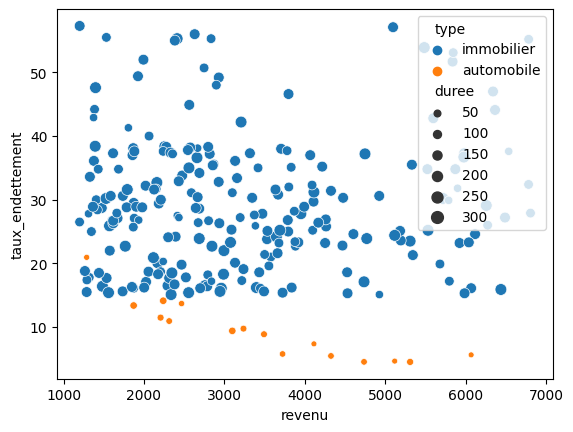

In [5]:
# Ajout de couleur par type d'emprunt 
# et taille des bulles en fonction de la durée de l'emprunt
sns.scatterplot(data=prets, 
                x='revenu', 
                y='taux_endettement', 
                hue='type',
                size='duree' # Taille des bulles
                )

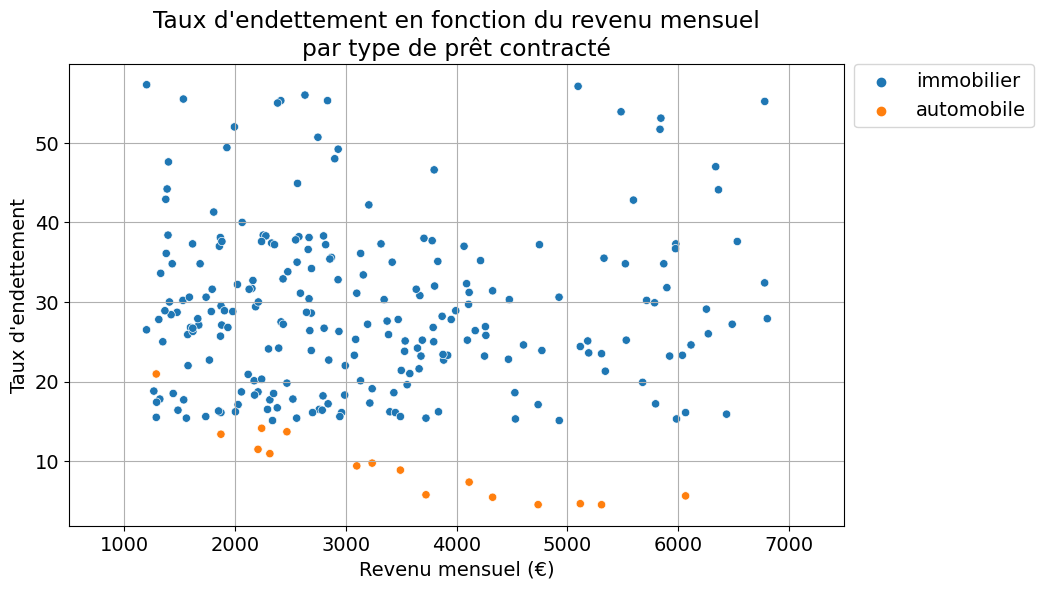

In [6]:
# Combinaison des packages Matplotlib et Seaborn

plt.figure(figsize=(10,6)) # Largeur, Hauteur

# La fonctionrcParams.update , avec l’argumentfont.size , 
# définit pour tous les graphiques – et non pas uniquement 
# le graphique actuel – la taille de la police de tous les éléments 
# (xlabel, title, legend, etc.) à 14.
plt.rcParams.update({'font.size': 14})

sns.scatterplot(
    data=prets, # données de la DF
    x='revenu', # données dans l'axe des abscisses
    y='taux_endettement',  # données dans l'axe des ordonnées
    hue='type' # ajout automatique des couleurs
    )

plt.ylabel("Taux d'endettement") # légende axe des ordonnées

plt.xlabel('Revenu mensuel (€)') # légende axe des abscisses 

plt.grid() # quadrillage

plt.xlim(500, 7500) # limitation des graduations

plt.legend(
    bbox_to_anchor=( # affichage de la légende en dehors du graphique
        1, 1.02) # coordonnées de la légende en dehors du graphique
    )

plt.title( # Titre du graphique
    "Taux d'endettement en fonction du revenu mensuel\npar type de prêt contracté")

plt.show()

<font color = 'yellow'>Exemple d'un configuration d'un diagramme à barres</font>

C:\Users\LRCOM\AppData\Local\Temp\ipykernel_4952\3877564729.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prets,


<AxesSubplot: xlabel='ville', ylabel='remboursement'>

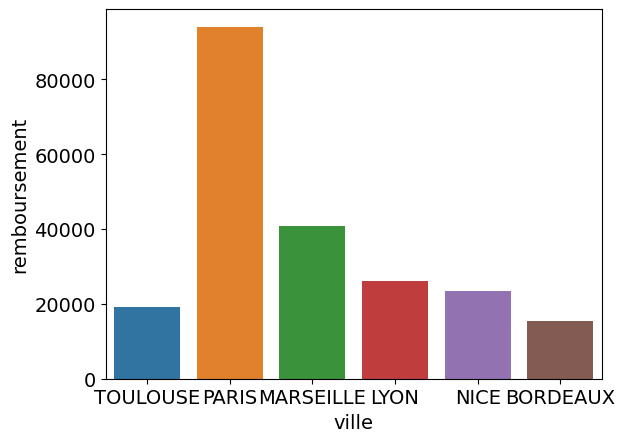

In [7]:
# CA total par agence
sns.barplot(data=prets, 
            x='ville', 
            y='remboursement',
            ci=None, # Evite l'affichage d'une intervalle au-dessus des barres
            estimator=sum # type de valeur à afficher en barres
            )

C:\Users\LRCOM\AppData\Local\Temp\ipykernel_4952\2340393766.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prets, # récupération de la DF


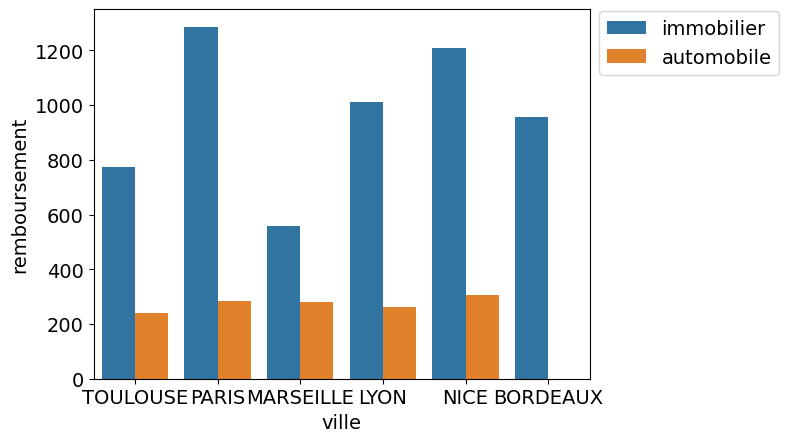

In [8]:
# Autre présentation
sns.barplot(data=prets, # récupération de la DF
            x='ville', # Données dans l'axe des abscisses
            y='remboursement', # Données dans l'axe des ordonnées
            ci=None, # Evite l'affichage d'une intervalle au-dessus des barres
            estimator=np.mean, # type de valeurs à ajouter en barre
            hue='type' # ajout de couleurs automatiques
            )

plt.legend(
    bbox_to_anchor=( # affichage de la légende en dehors du graphique
        1, 1.02) # coordonnées de la légende en dehors du graphique
    )

##### <font color = 'green'>Amélioration de l'aspect graphique</font>

Seaborn apporte un vrai plus esthétique par rapport à Matplotlib. 

Deux aspects permettent cela : les palettes graphiques et les thèmes.


<font color = 'yellow'>Les palettes graphiques</font>

Les palettes graphiques correspondent à un ensemble de couleurs qui vont être utilisées dans un graphique. 

Vous pouvez naturellement les définir vous-même, mais Seaborn propose plusieurs palettes, utilisables à votre guise, qui sont particulièrement harmonieuses. 

Documentation :
https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color

C:\Users\LRCOM\AppData\Local\Temp\ipykernel_4952\2574471628.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prets,


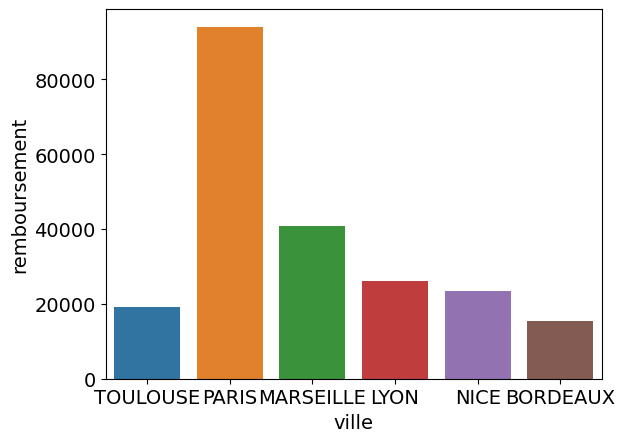

In [9]:
# CA total par agence
sns.barplot(data=prets, 
            x='ville', 
            y='remboursement',
            ci=None, # Evite l'affichage d'une intervalle au-dessus des barres
            estimator=sum # type de valeur à afficher en barres
            )

# Ajout d'une palette
sns.set_palette('dark')

<font color = 'yellow'>Les thèmes</font>

Les thèmes correspondent à des ensembles d’aspects graphiques (sur les axes, le fond, la graduation, etc.) prédéfinis par Seaborn et utilisables à notre guise. 

On peut choisir un thème à appliquer via la fonction set_theme

C:\Users\LRCOM\AppData\Local\Temp\ipykernel_4952\1899525833.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prets,


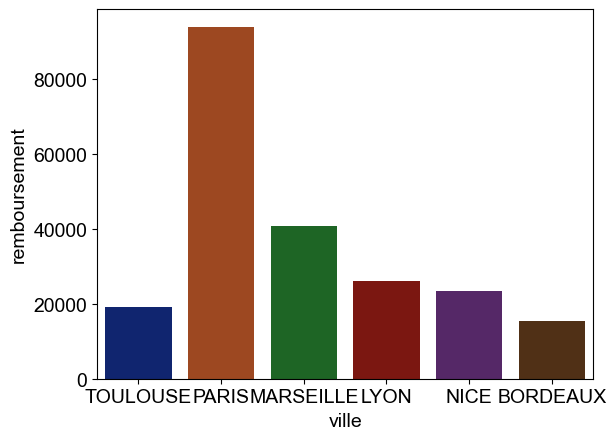

In [10]:
# CA total par agence
sns.barplot(data=prets, 
            x='ville', 
            y='remboursement',
            ci=None, # Evite l'affichage d'une intervalle au-dessus des barres
            estimator=sum # type de valeur à afficher en barres
            )

# Ajout d'un thème
sns.set_theme(style='whitegrid', palette='pastel')

##### <font color = 'green'>Cas pratique</font>

Générez des graphiques complexes avec Seaborn

Habituellement, les graphiques du reporting mensuels sont réalisés avec matplotlib. Votre ultime tâche va être d’améliorer quelque peu le visuel de ces derniers et de les reprendre avec Seaborn.

L’objectif va être de reprendre le travail qui avait été réalisé précédemment, avec Seaborn. En plus de ces graphiques, quelques demandes additionnelles ont été glissées par votre manager.

Les graphiques à produire sont donc : 
- la proportion de prêt par type de prêt
- le bénéfice mensuel réalisé en fonction du revenu du client
- la distribution des bénéfices réalisés
- le bénéfice mensuel total réalisé par agence

In [11]:
# DF récupéré pour l'exercice
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets_final.csv')

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


<font color = 'yellow'>1. proportion de prêt par type de prêt</font>

Pour réaliser ce graphique, vous pouvez naturellement ré-utiliser l'agrégation, mais le mieux est de laisser travailler seaborn, en utilisant la fonction [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

<AxesSubplot: xlabel='type', ylabel='count'>

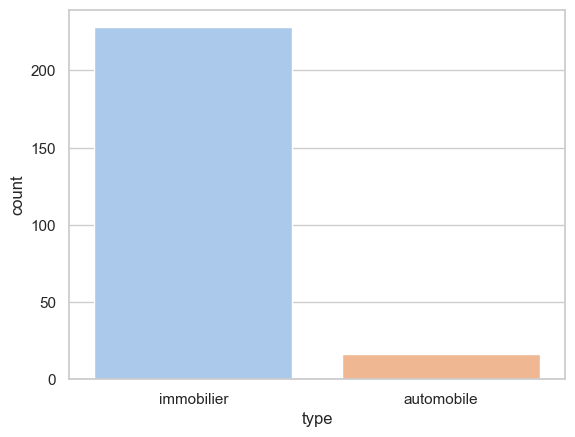

In [12]:
sns.countplot(data=prets, x='type')

<font color = 'yellow'>2. bénéfice mensuel réalisé en fonction du revenu du client - prêts immobiliers</font>

Pour ce graphique, vous ajouterez simplement en couleur l'information de l'agence où a été réalisé le prêt

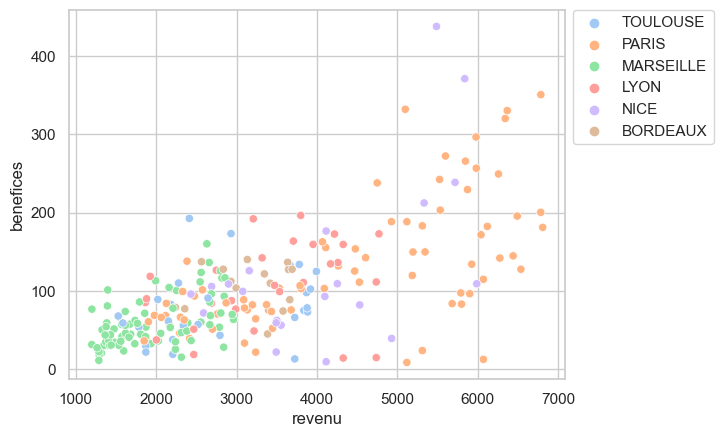

In [13]:
sns.scatterplot(data=prets,
                x='revenu',
                y='benefices',
                hue='ville')

plt.legend(
    bbox_to_anchor=( # affichage de la légende en dehors du graphique
        1, 1.02) # coordonnées de la légende en dehors du graphique
    )


<font color = 'yellow'>3. La distribution des bénéfices réalisés</font>

Nous souhaitons avoir un histogramme classique et un à densité. Vous aurez besoin des fonctions : 
- [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) pour l'histogramme
- [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) pour le diagramme à densité

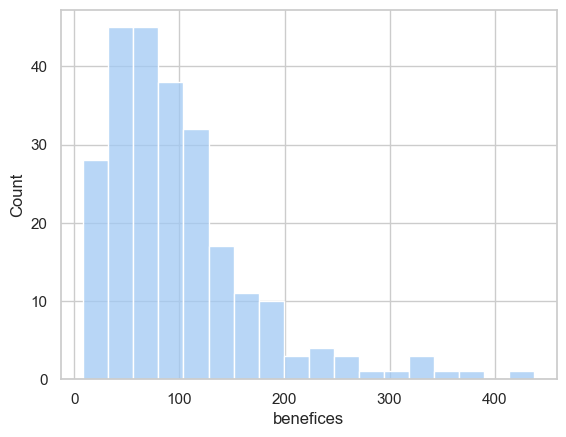

In [14]:
# histogramme :
sns.histplot(data=prets, x='benefices')
plt.show()

<AxesSubplot: xlabel='benefices', ylabel='Density'>

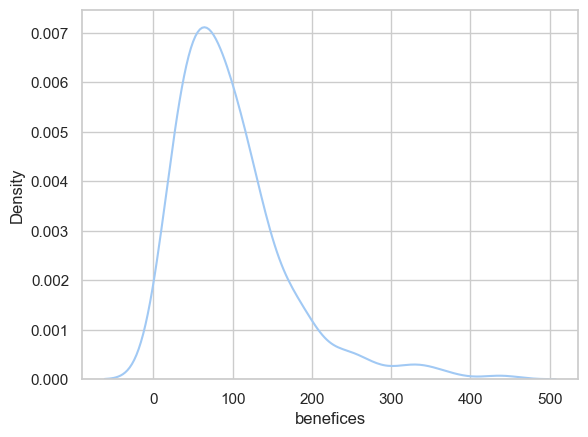

In [15]:
# diagramme à densité :
sns.kdeplot(data=prets, x='benefices')

<font color = 'yellow'>4. bénéfice mensuel total réalisé par agence</font>

Pour ce graphique, on souhaite avoir 2 barres par ville : une pour chaque type de prêt

C:\Users\LRCOM\AppData\Local\Temp\ipykernel_4952\3574117105.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prets,


<AxesSubplot: xlabel='ville', ylabel='benefices'>

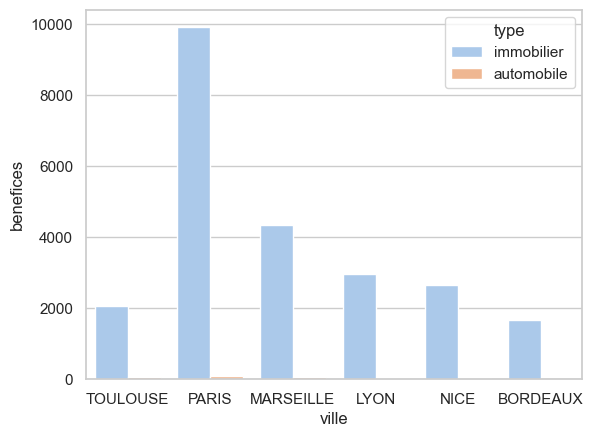

In [16]:
sns.barplot(data=prets, 
            x='ville', 
            y='benefices', 
            ci=None, 
            hue='type', 
            estimator=sum)